<a href="https://colab.research.google.com/github/jh941213/crawling/blob/main/10_API%E1%84%85%E1%85%B3%E1%86%AF_%E1%84%8B%E1%85%B5%E1%84%8B%E1%85%AD%E1%86%BC%E1%84%92%E1%85%A1%E1%86%AB_%E1%84%8F%E1%85%B3%E1%84%85%E1%85%A9%E1%86%AF%E1%84%85%E1%85%B5%E1%86%BC(%E1%84%8F%E1%85%A1%E1%84%8F%E1%85%A1%E1%84%8B%E1%85%A92).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 15. 카카오 API를 이용한 크롤링(2)

## 1. 카카오 API - 번역 
번역 개발 가이드 : https://developers.kakao.com/docs/latest/ko/translate/dev-guide

### 1-1. 문장 번역하기
개발가이드를 참고하여 url과 parameter 값을 적절히 입력하여 번역된 문장(response body)을 받아온다.
- url = Host + GET
- parameter의 경우 query(번역할 문장), src_lang(번역 대상 언어), target_lang(번역 결과 언어) 값을 입력해주어야 한다.
- 지원 언어 표기 : https://developers.kakao.com/docs/latest/ko/translate/common#language


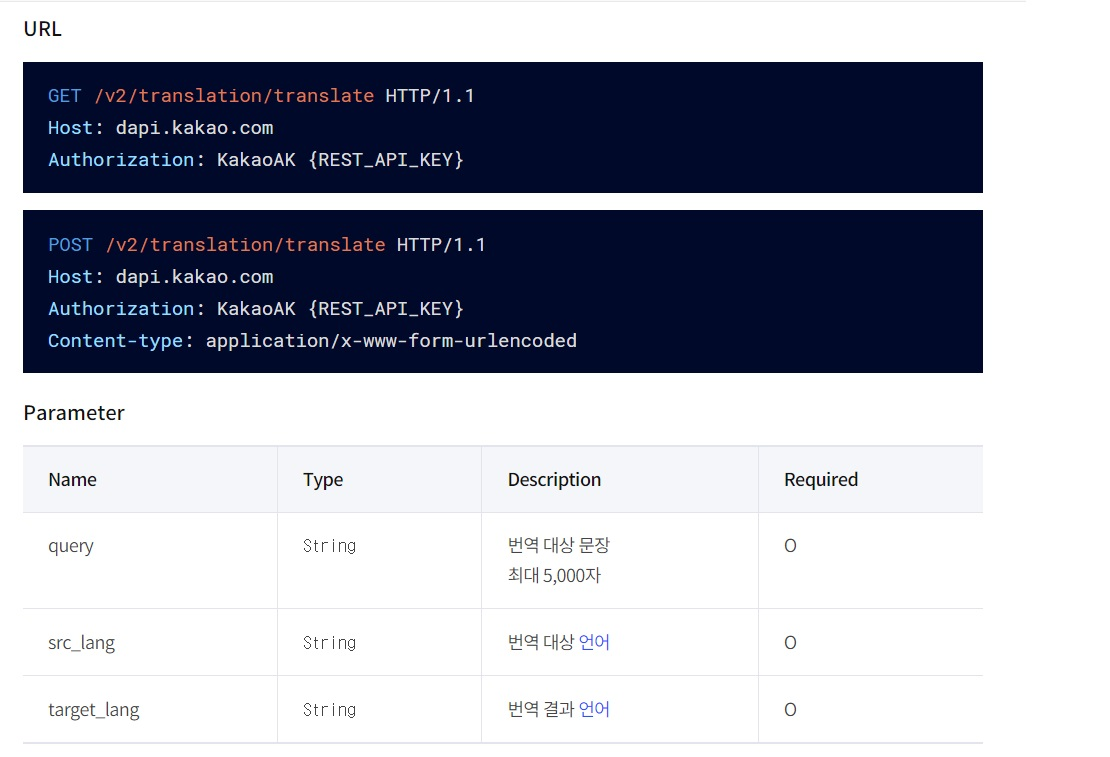

In [ ]:
import requests
import json

# Host + Get 형식으로 url을 만들어줘야 한다.
url = "https://dapi.kakao.com/v2/translation/translate"  

trans_str = input('번역할 문장 입력 : ')

params = {'query' : trans_str,
          'src_lang' : 'kr',
          'target_lang' : 'en'} 

header = {'Authorization': 'KakaoAK {key}'}  #Admin key 입력 / key가 12345라면 'KakaoAK 12345' 라고 입력!

resp = requests.get(url, headers=header, params=params) 
print(resp)

번역할 문장 입력 : 어제는 피자를 먹었으니 오늘은 치킨을 먹자!
<Response [200]>


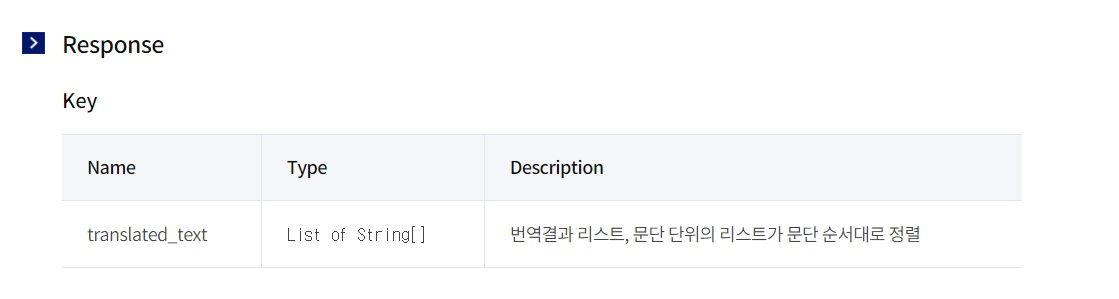

In [ ]:
tokens = resp.json()
print(tokens)
print('번역된 문장 결과 :',tokens['translated_text'][0][0])

{'translated_text': [["I ate pizza yesterday, so let's eat chicken today!"]]}
번역된 문장 결과 : I ate pizza yesterday, so let's eat chicken today!


### 1-2. 입력된 텍스트의 언어 감지하기
마찬가지로 번역 개발가이드(하단)를 참고하여 url과 parameter 값을 적절히 입력하여 response body를 가져온다.

언어 감지 API의 경우 결과가 리스트로 반환되며, 신뢰도가 높은 순서대로 최대 3개의 결과가 반환된다.


In [ ]:
import requests
import json

# Host + Get 형식으로 url을 만들어줘야 한다.
url = "https://dapi.kakao.com/v3/translation/language/detect"  

text = input('언어 감지할 문장 입력 : ')

params = {'query' : text} 

header = {'Authorization': 'KakaoAK {key}'}  #Admin key 입력

resp = requests.get(url, headers=header, params=params) 
print(resp)

언어 감지할 문장 입력 : Hi! How are you?
<Response [200]>


In [ ]:
tokens = resp.json()
tokens

{'language_info': [{'code': 'en', 'confidence': 0.9479, 'name': 'English'},
  {'code': 'de', 'confidence': 0.03658, 'name': 'German'},
  {'code': 'id', 'confidence': 0.00479, 'name': 'Indonesian'}]}

In [ ]:
for rank in range(len(tokens['language_info'])) :
    print(f'{rank+1}순위 감지 언어')
    print('코드 :',tokens['language_info'][rank]['code'])
    print('언어 :', tokens['language_info'][rank]['name'])
    print('신뢰도 :', tokens['language_info'][rank]['confidence'])
    print()

1순위 감지 언어
코드 : en
언어 : English
신뢰도 : 0.9479

2순위 감지 언어
코드 : de
언어 : German
신뢰도 : 0.03658

3순위 감지 언어
코드 : id
언어 : Indonesian
신뢰도 : 0.00479



## 2. 카카오 API - 비전
비전 개발 가이드 : https://developers.kakao.com/docs/latest/ko/vision/dev-guide


### 2-1. 얼굴 검출 API를 이용하여 이미지 속 사람의 나이와 성별을 예측할 수 있다. 

In [ ]:
import requests
import json

# Host + Get 형식으로 url을 만들어줘야 한다.
url = "https://dapi.kakao.com/v2/vision/face/detect"  

image_url = 'https://mymodernmet.com/wp/wp-content/uploads/2019/09/100k-ai-faces-5.jpg' #여자얼굴의 이미지

params = {'image_url' : image_url} 

header = {'Authorization': 'KakaoAK {key}'}  #Admin key 입력

resp = requests.get(url, headers=header, params=params) 
print(resp)

<Response [200]>


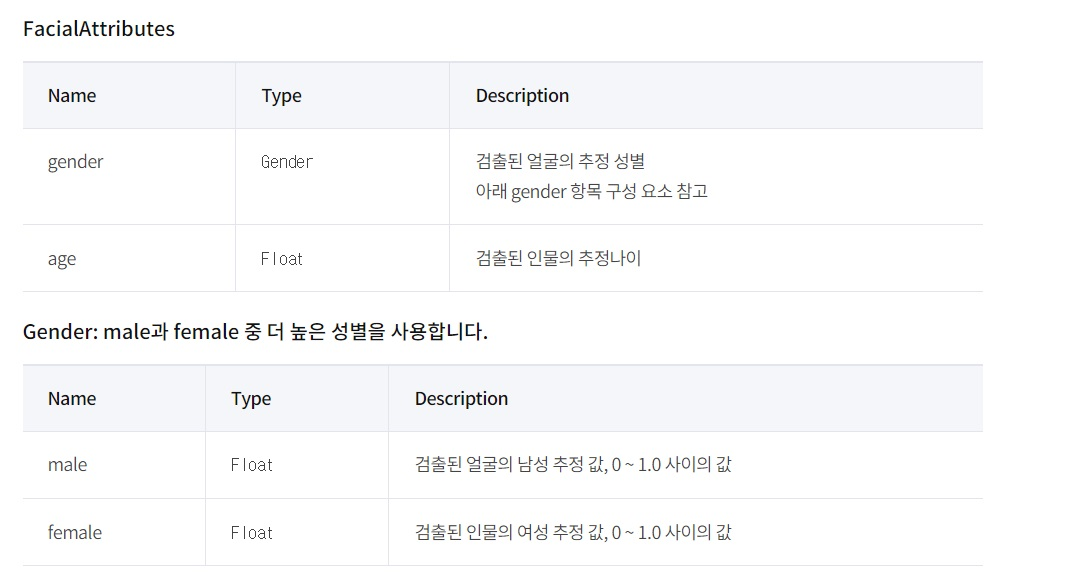

In [ ]:
tokens = resp.json()
pred_age = tokens['result']['faces'][0]['facial_attributes']['age']
pred_male = tokens['result']['faces'][0]['facial_attributes']['gender']['male']
pred_female = tokens['result']['faces'][0]['facial_attributes']['gender']['female']


print('예측 나이 : {:1.0f}'.format(pred_age))
print('남성 확률 : {:.2f}'.format(pred_male))
print('여성 확률 : {:.2f}'.format(pred_female))

예측 나이 : 27
남성 확률 : 0.02
여성 확률 : 0.98


In [ ]:
if pred_male > pred_female :
    print('이미지 속 사람은 약 {:1.0f}살의 남성으로 예측됩니다.'.format(pred_age))
else :
    print('이미지 속 사람은 약 {:1.0f}살의 여성으로 예측됩니다.'.format(pred_age))

이미지 속 사람은 약 27살의 여성으로 예측됩니다.


### 2-2. 여러 명의 얼굴이 있는 사진으로 예측하기

In [ ]:
# Host + Get 형식으로 url을 만들어줘야 한다.
url = "https://dapi.kakao.com/v2/vision/face/detect"  

#6명의 얼굴이 있는 이미지
image_url = 'https://cdn.vox-cdn.com/thumbor/1ck1fQL62j2GaDvOlnJu4fyuIIc=/0x0:3049x2048/1200x800/filters:focal(1333x1562:1819x2048)/cdn.vox-cdn.com/uploads/chorus_image/image/63058104/fake_ai_faces.0.png' #여자얼굴의 이미지

params = {'image_url' : image_url} 

header = {'Authorization': 'KakaoAK {key}'}  #Admin key 입력

resp = requests.get(url, headers=header, params=params) 

tokens = resp.json()

for i in range(len(tokens['result']['faces'])) :
    pred_age = tokens['result']['faces'][i]['facial_attributes']['age']
    pred_male = tokens['result']['faces'][i]['facial_attributes']['gender']['male']
    pred_female = tokens['result']['faces'][i]['facial_attributes']['gender']['female']

    if pred_male > pred_female :
        print('이미지 속 {}번째 사람은 약 {:1.0f}살의 남성으로 예측됩니다.'.format(i+1, pred_age))
    else :
        print('이미지 속 {}번째 사람은 약 {:1.0f}살의 여성으로 예측됩니다.'.format(i+1, pred_age))

이미지 속 1번째 사람은 약 9살의 여성으로 예측됩니다.
이미지 속 2번째 사람은 약 27살의 여성으로 예측됩니다.
이미지 속 3번째 사람은 약 24살의 남성으로 예측됩니다.
이미지 속 4번째 사람은 약 36살의 여성으로 예측됩니다.
이미지 속 5번째 사람은 약 37살의 남성으로 예측됩니다.
이미지 속 6번째 사람은 약 39살의 여성으로 예측됩니다.


### 2-3. 개발가이드를 참고하여 그밖에 이미지에 대한 다른 정보들을 가져와보세요